INDIA VIC PREDICTION


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [5]:
# Load the data
dataSet=pd.read_csv('main_data.csv')

In [6]:
#sample of data
dataSet.head()

,date,value
0,2025-02-10 24:00,50.04
1,2025-02-10 24:01,50.00
2,2025-02-10 24:03,49.94
3,2025-02-10 24:03,49.94
4,2025-02-10 24:05,49.91


In [7]:
#cleaning the data
dataSet = dataSet.dropna(subset=['date'])
dataSet.set_index('date', inplace=True)

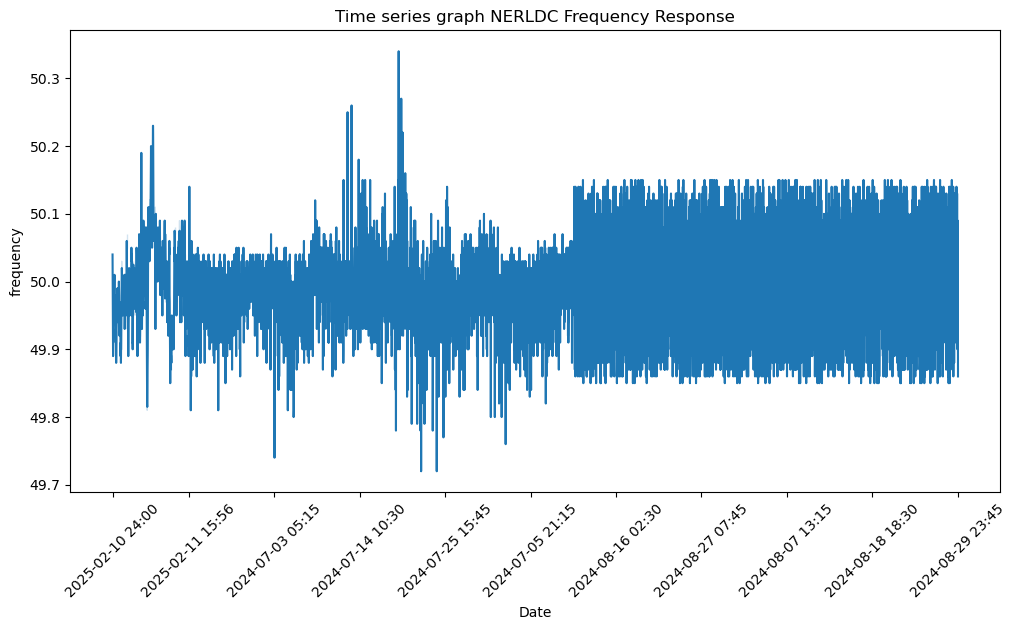

In [8]:
#plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataSet, y='value', x=dataSet.index)
N = len(dataSet) // 10
plt.xticks(dataSet.index[::N], rotation=45)  
plt.title('Time series graph NERLDC Frequency Response')
plt.xlabel('Date')
plt.ylabel('frequency')
plt.show()

RMSE: 0.06351
                  value  rolling_mean
date                                 
2024-07-01 00:00  49.99           NaN
2024-07-01 00:15  50.00           NaN
2024-07-01 00:30  50.01           NaN
2024-07-01 00:45  50.00           NaN
2024-07-01 01:00  49.97           NaN
...                 ...           ...
2025-02-11 16:03  50.14     49.990714
2025-02-11 16:05  50.06     50.015000
2025-02-11 16:06  50.03     50.030714
2025-02-11 16:08  49.98     50.041429
2025-02-11 16:09  49.99     50.047143

[6552 rows x 2 columns]


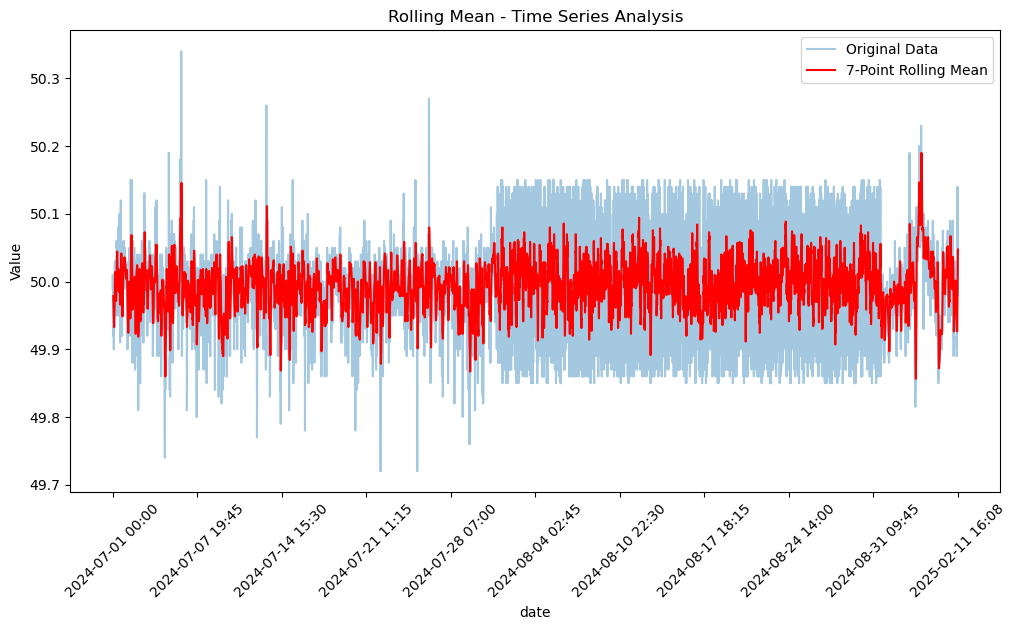

In [9]:
#apply only moving average with lag of 7
dataSet = dataSet.groupby(dataSet.index).mean()
dataSet['rolling_mean'] = dataSet['value'].rolling(window=7).mean()
import numpy as np
df_clean = dataSet.dropna()
rmse = np.sqrt(np.mean((df_clean["value"] - df_clean["rolling_mean"]) ** 2))
print(f"RMSE: {rmse:.5f}")

print(dataSet)

#ploting actual data and moving average 
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataSet, y='value', x=dataSet.index, alpha=0.4, label="Original Data")
sns.lineplot(data=dataSet, y='rolling_mean', x=dataSet.index, label="7-Point Rolling Mean", color='red')
N = len(dataSet) // 10
plt.xticks(dataSet.index[::N], rotation=45) 
plt.title("Rolling Mean - Time Series Analysis")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()


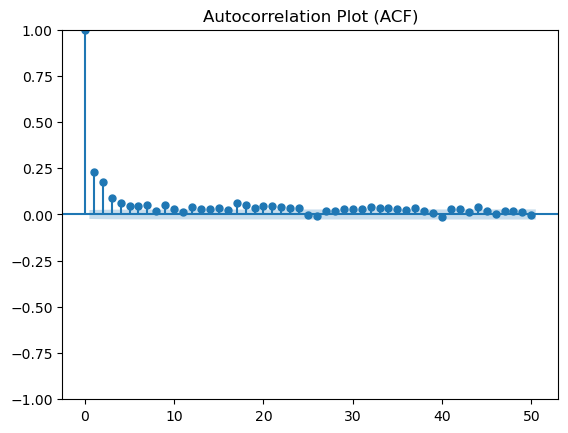

In [10]:
#autoceorrelation plot
plot_acf(dataSet['value'], lags=50)  
plt.title("Autocorrelation Plot (ACF)")
plt.show()

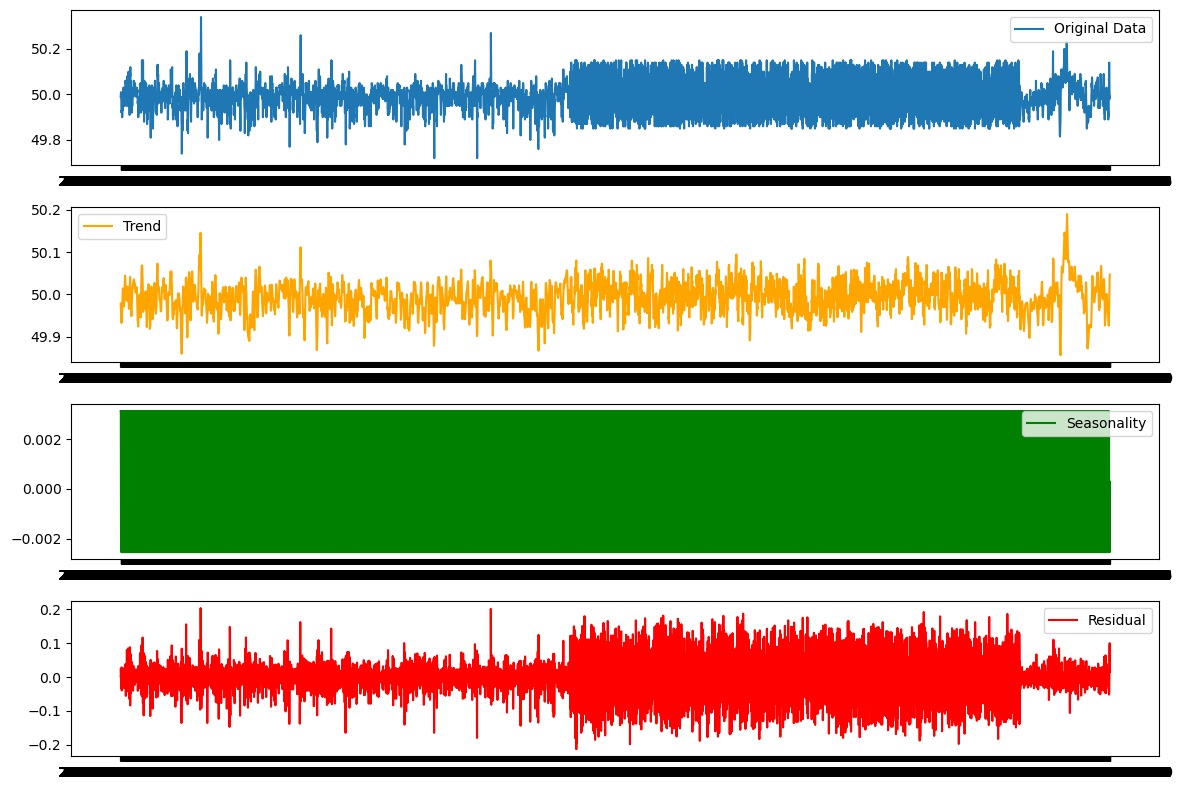

In [11]:
#seasonal decomposition
decomposition = seasonal_decompose(dataSet['value'], model='additive', period=7) 
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(dataSet['value'], label="Original Data")
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color='orange')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color='green')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residual", color='red')
plt.legend()
plt.tight_layout()
plt.show()


c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sujal\anaconda3\Lib\site-

Root Mean Squared Error (RMSE): 0.0880


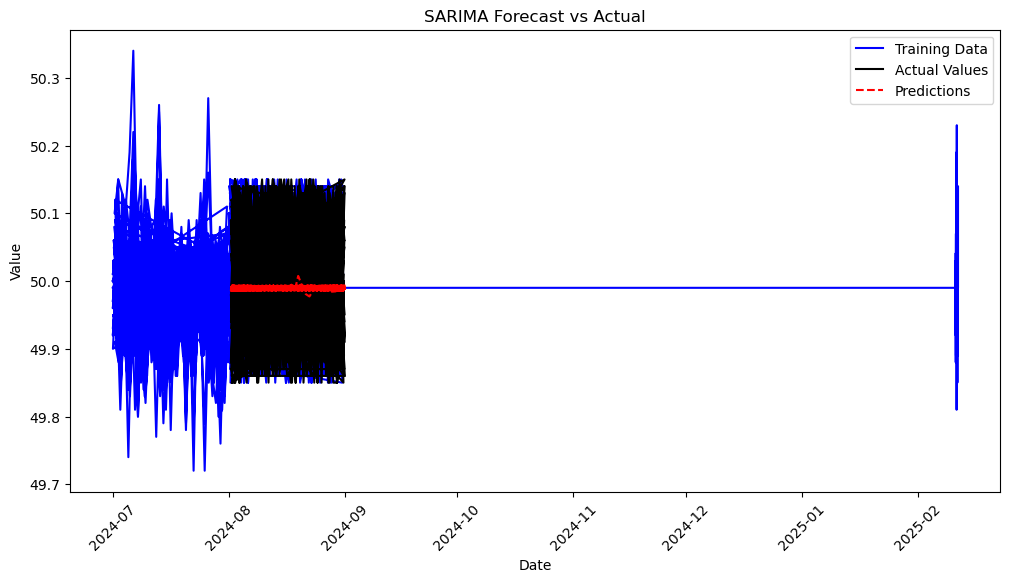

In [12]:
#apply seasonal arima model
dataSet = pd.read_csv("main_data.csv")
dataSet['date'] = dataSet['date'].astype(str)
dataSet['date'] = dataSet['date'].str.replace(
    r"(.*) 24:00", lambda x: (pd.to_datetime(x.group(1)) + pd.DateOffset(days=1)).strftime('%Y-%m-%d 00:00'), regex=True
)
dataSet['date'] = pd.to_datetime(dataSet['date'], errors='coerce')
dataSet.dropna(subset=['date'], inplace=True)
dataSet.set_index('date', inplace=True)

# Split dataset into training (80%) and testing (20%)
train_size = int(len(dataSet) * 0.8)
train, test = dataSet.iloc[:train_size], dataSet.iloc[train_size:]

# Fit SARIMA model (Adjust p, d, q, P, D, Q, and seasonality as needed)
sarima_model = SARIMAX(train, order=(5, 1, 2), seasonal_order=(1, 1, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label="Training Data", color="blue")
plt.plot(test.index, test, label="Actual Values", color="black")
plt.plot(test.index, predictions, label="Predictions", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.xticks(rotation=45)
plt.show()


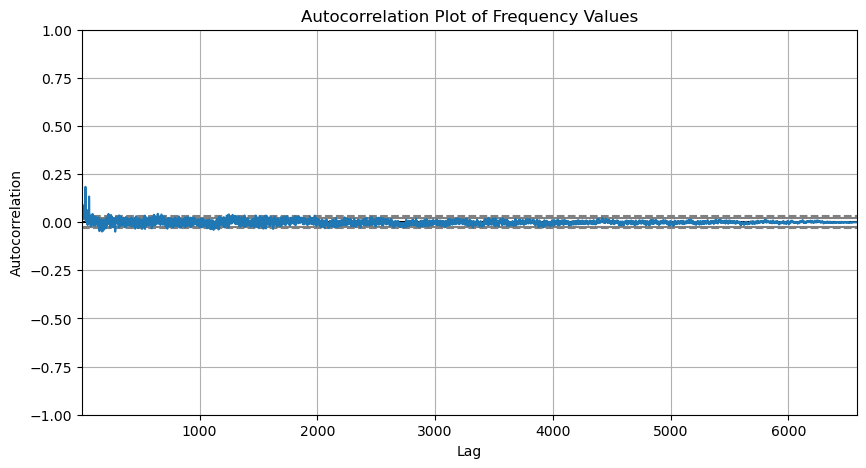

In [13]:
plt.figure(figsize=(10, 5))
autocorrelation_plot(dataSet["value"])
plt.title("Autocorrelation Plot of Frequency Values")
plt.show()

c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 6623
Model:                ARIMA(10, 1, 0)   Log Likelihood                8053.853
Date:                Thu, 13 Feb 2025   AIC                         -16085.706
Time:                        19:01:14   BIC                         -16010.927
Sample:                             0   HQIC                        -16059.866
                               - 6623                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8608      0.011    -81.052      0.000      -0.882      -0.840
ar.L2         -0.7359      0.014    -52.981      0.000      -0.763      -0.709
ar.L3         -0.6507      0.016    -40.903      0.0

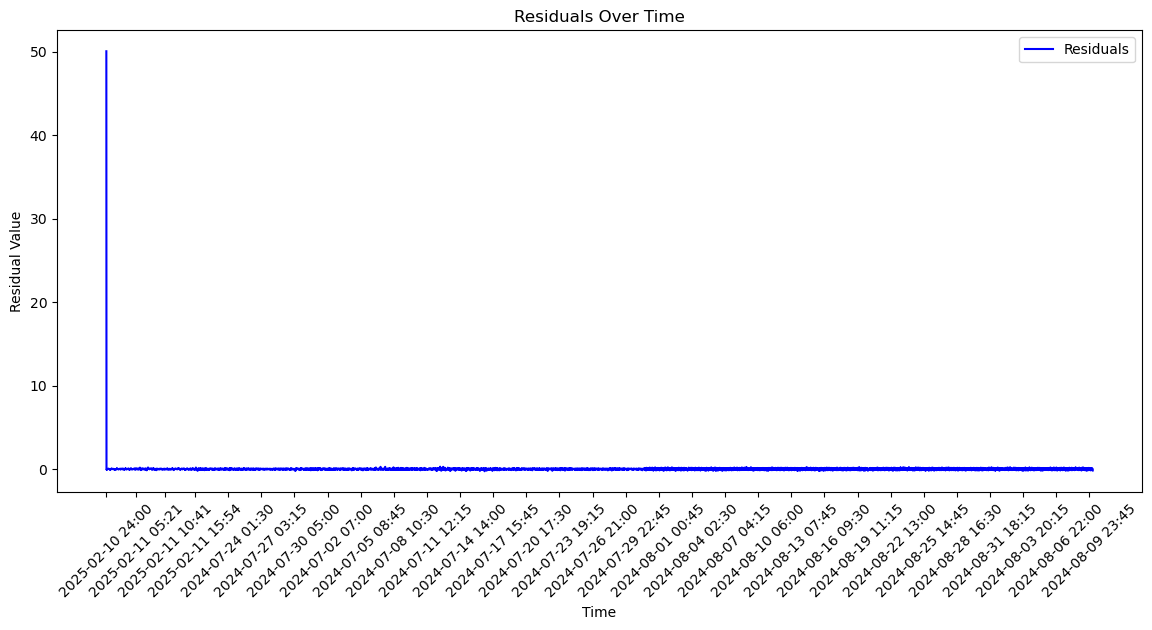

<Figure size 1200x500 with 0 Axes>

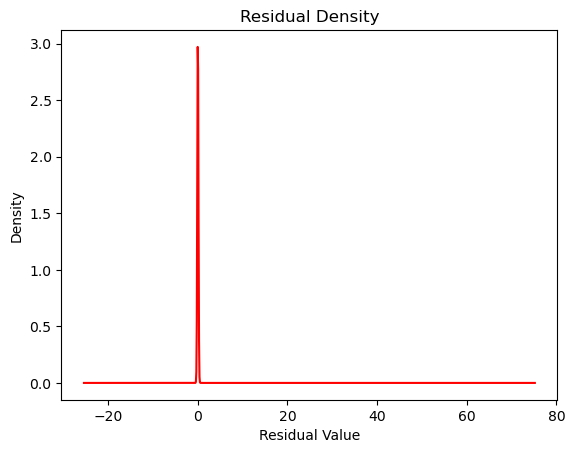

                 0
count  6623.000000
mean      0.007547
std       0.619046
min      -0.264441
25%      -0.042411
50%       0.003847
75%       0.042801
max      50.040000


In [ ]:
#ARMA model
dataSet = pd.read_csv('main_data.csv')
dataSet.dropna(subset=['date'], inplace=True)
dataSet.set_index('date', inplace=True)
model = ARIMA(dataSet, order=(10,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.index = dataSet.index
plt.figure(figsize=(14, 6))
plt.plot(residuals, label="Residuals", color='blue')
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.title("Residuals Over Time")
step = max(1, len(residuals) // 30)
plt.xticks(residuals.index[::step], rotation=45)
plt.legend()
plt.show()
plt.figure(figsize=(12, 5))
residuals.plot(kind='kde', color='red', title="Residual Density", legend=False)
plt.xlabel("Residual Value")
plt.show()
print(residuals.describe())


C:\Users\sujal\AppData\Local\Temp\ipykernel_22848\2199793428.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=50.023029, expected=50.020000
predicted=50.024729, expected=50.100000
predicted=50.048566, expected=49.890000
predicted=49.999731, expected=50.090000
predicted=50.017733, expected=49.910000
predicted=49.987619, expected=49.900000
predicted=49.985251, expected=49.900000
predicted=49.952603, expected=50.090000
predicted=49.996486, expected=50.050000
predicted=49.997583, expected=50.010000
predicted=50.012191, expected=49.960000
predicted=49.983110, expected=50.110000
predicted=50.016794, expected=49.970000
predicted=49.992906, expected=50.090000
predicted=50.018754, expected=49.980000
predicted=49.996537, expected=49.960000
predicted=49.999089, expected=49.990000
predicted=50.001522, expected=49.940000
predicted=50.007363, expected=50.070000
predicted=50.010232, expected=50.000000
predicted=50.012014, expected=49.920000
predicted=49.988276, expected=50.120000
predicted=50.019869, expected=49.970000
predicted=50.007592, expected=50.010000
predicted=50.000698, expected=50.120000


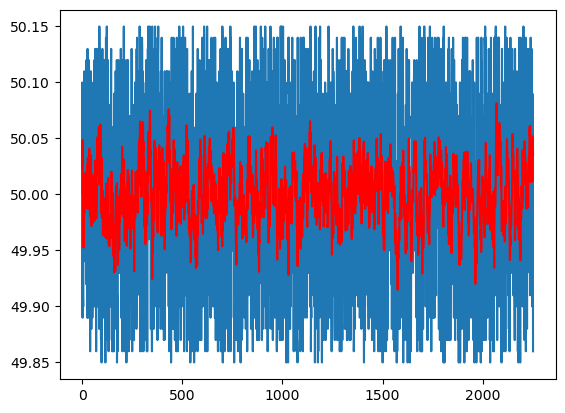

In [19]:

X = dataSet.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# Debugging: Check the index range and adjust forecasting step
def rolling_arima_fixed(dataSet, order=(1, 1, 1), window=100):
    actuals, predictions = [], []

    for i in range(window, len(dataSet)):
        train = dataSet['value'].iloc[i - window:i].values  
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        
        pred = model_fit.forecast(steps=1)[0]  
        actual = dataSet['value'].iloc[i]  

        predictions.append(pred)
        actuals.append(actual)

    return np.sqrt(mean_squared_error(actuals, predictions)), actuals, predictions

# Apply the fixed rolling ARIMA
rmse_fixed, actuals_fixed, predictions_fixed = rolling_arima_fixed(dataSet, order=(1,1,1), window=100)
rmse_fixed


c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\sujal\anaconda3\Lib\site-packages\statsmodels\base\model

0.06974017613575677